In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Optional, if you want nicer plots:
plt.style.use('default')


# 1. Data Loading and Initial Inspection

In this section, I load the raw Wintermute transfer dataset from CSV into a pandas DataFrame
and take a quick look at the first few rows to understand the structure and columns.

In [2]:
df = pd.read_csv("wintermute_transfers_search_default_2025-04-08.csv")
df.head()


,timestamp,from_address,from_entity,to_address,to_entity,token,value,usd,tx_hash,chain,block_number
0,2025-04-08 12:49:57+00:00,0xB1026b8e7276e7AC75410F1fcbbe21796e8f7526,Camelot,0x51C72848c68a965f66FA7a88855F9f7784502a7F,Wintermute,USDC,438.108563,438.108563,0x98058c529466064c355bdfea3cfebe399344678f20bb...,arbitrum_one,324218955.0
1,2025-04-08 12:49:54+00:00,0xcDa53B1F66614552F834cEeF361A8D12a0B8DaD8,Uniswap,0x51C72848c68a965f66FA7a88855F9f7784502a7F,Wintermute,ARB,3837.138536,1062.879700,0x405b146ac6a52b93e5a77760a4b49a87015b5c5e0659...,arbitrum_one,324218945.0
2,2025-04-08 12:49:51+00:00,0xb2cc224c1c9feE385f8ad6a55b4d94E92359DC59,Aerodrome Finance,0x51C72848c68a965f66FA7a88855F9f7784502a7F,Wintermute,WETH,7.345922,11533.612401,0x7f370fc61bed7241d846c4907a4e616e69ce60ff0192...,base,28663622.0
3,2025-04-08 12:49:51+00:00,0x51C72848c68a965f66FA7a88855F9f7784502a7F,Wintermute,0x72AB388E2E2F6FaceF59E3C3FA2C4E29011c2D38,PancakeSwap,USDC,2143.712587,2143.712587,0x88b4fb948e95cc2b9a22c48efe3d6a6788209302e72f...,base,28663622.0
4,2025-04-08 12:49:50+00:00,0x641C00A822e8b671738d32a431a4Fb6074E5c79d,Uniswap,0x51C72848c68a965f66FA7a88855F9f7784502a7F,Wintermute,WETH,0.470011,737.550466,0x39fc603c882c2f5af51b7f8cfc8eb58753f5e42eff94...,arbitrum_one,324218918.0


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437000 entries, 0 to 436999
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   timestamp     437000 non-null  object 
 1   from_address  436982 non-null  object 
 2   from_entity   403700 non-null  object 
 3   to_address    436974 non-null  object 
 4   to_entity     407141 non-null  object 
 5   token         436955 non-null  object 
 6   value         437000 non-null  float64
 7   usd           437000 non-null  float64
 8   tx_hash       436956 non-null  object 
 9   chain         437000 non-null  object 
 10  block_number  436956 non-null  float64
dtypes: float64(3), object(8)
memory usage: 36.7+ MB


In [4]:
df.describe(include="all")


,timestamp,from_address,from_entity,to_address,to_entity,token,value,usd,tx_hash,chain,block_number
count,437000,436982,403700,436974,407141,436955,4.370000e+05,4.370000e+05,436956,437000,4.369560e+05
unique,31389,3889,80,3715,74,168,NaN,NaN,190778,10,NaN
top,2025-04-08 11:32:23+00:00,0x51C72848c68a965f66FA7a88855F9f7784502a7F,Wintermute,0x51C72848c68a965f66FA7a88855F9f7784502a7F,Wintermute,USDC,NaN,NaN,0xe7a0e95d3ce862de09546d2d4e7b0beb9753dd6340c8...,solana,NaN
freq,372,66902,231737,63389,184897,117773,NaN,NaN,10,298324,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,1.968029e+08,4.529982e+03,NaN,NaN,2.912209e+08
std,NaN,NaN,NaN,NaN,NaN,NaN,1.600531e+10,1.047393e+05,NaN,NaN,1.007091e+08
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,NaN,NaN,2.222090e+07
25%,NaN,NaN,NaN,NaN,NaN,NaN,2.788714e-01,5.000150e+01,NaN,NaN,3.241597e+08
50%,NaN,NaN,NaN,NaN,NaN,NaN,5.953352e+00,2.332162e+02,NaN,NaN,3.320278e+08
75%,NaN,NaN,NaN,NaN,NaN,NaN,3.159202e+02,1.172169e+03,NaN,NaN,3.320692e+08


In [5]:
df_clean = df.copy()


# 2. Data Cleaning

Here I create a cleaned version of the raw dataset (`df_clean`) and standardise core fields
such as timestamps and addresses. This prepares the data for reliable aggregation and
time-series analysis.


In [6]:
# ----------------------------------------------------------
# 1. Clean 'timestamp'
# ----------------------------------------------------------
# Convert from object/string → datetime for sorting, filtering, resampling
df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'], errors='coerce')


Explain: If any timestamps fail to parse, mark them as NaT
(Blockchain data can sometimes contain malformed timestamps.)



In [7]:

# 2. Clean 'from_address' and 'to_address'
# ----------------------------------------------------------
# Strip spaces and lowercase to ensure consistent formatting
df_clean['from_address'] = df_clean['from_address'].str.strip().str.lower()
df_clean['to_address'] = df_clean['to_address'].str.strip().str.lower()

# Explain:

 Explain:
 Blockchain addresses are case-insensitive for identity and sometimes
appear in mixed-case (EIP-55). Lowercasing avoids duplicates such as:
  0xABC...  vs  0xabc...

In [8]:
# 3. Clean 'from_entity' and 'to_entity'
# ----------------------------------------------------------
# Replace missing values with "Unknown"
df_clean['from_entity'] = df_clean['from_entity'].fillna("Unknown").str.strip()
df_clean['to_entity'] = df_clean['to_entity'].fillna("Unknown").str.strip()


In [9]:
# Normalize entity names: consistent casing
df_clean['from_entity'] = df_clean['from_entity'].str.title()
df_clean['to_entity'] = df_clean['to_entity'].str.title()


Explain:
 Many rows have missing entity labels (403k → 437k total) For classification later, "Unknown" is a clear category
 Title casing makes entities consistent: "uniswap" → "Uniswap"

In [10]:
# 4. Clean 'token'
# ----------------------------------------------------------
df_clean['token'] = df_clean['token'].fillna("UNKNOWN_TOKEN").str.strip().str.upper()


Explain:
 Token symbols should always be uppercase: "usdc", "Usdc" → "USDC"
 Missing tokens become "UNKNOWN_TOKEN" for transparency

In [11]:
# 5. Clean numerical columns: 'value' and 'usd'
# ----------------------------------------------------------
# Ensure numeric (should already be float, but enforce it)
df_clean['value'] = pd.to_numeric(df_clean['value'], errors='coerce')
df_clean['usd'] = pd.to_numeric(df_clean['usd'], errors='coerce')


In [12]:
# Replace negative/malformed values with NaN (should not exist in token transfers)
df_clean.loc[df_clean['value'] < 0, 'value'] = np.nan
df_clean.loc[df_clean['usd'] < 0, 'usd'] = np.nan


 Explain:
 Token transfer values should never be negative
Force numeric types to prevent plotting/aggregation issues

In [13]:
# 6. Clean 'tx_hash'
# ----------------------------------------------------------
df_clean['tx_hash'] = df_clean['tx_hash'].str.strip().str.lower()

In [14]:
# Remove rows missing transaction hash (these cannot be used in analysis)
df_clean = df_clean.dropna(subset=['tx_hash'])


 Explain:
 Lowercasing normalizes formatting
Missing tx hashes = incomplete data → remove

In [15]:
# 7. Clean 'chain'
# ----------------------------------------------------------
df_clean['chain'] = df_clean['chain'].str.strip().str.lower()


In [16]:
# Optionally standardize
chain_map = {
    'arbitrum_one': 'arbitrum',
    'eth': 'ethereum',
    'mainnet': 'ethereum',
    'bsc': 'binance_smart_chain',
    'solana': 'solana',
}

In [17]:
df_clean['chain'] = df_clean['chain'].replace(chain_map)


Explain:
 Chains sometimes appear under multiple aliases
 Standardizing ensures cleaner aggregation + visuals later

In [18]:
# 8. Clean 'block_number'
# ----------------------------------------------------------
df_clean['block_number'] = pd.to_numeric(df_clean['block_number'], errors='coerce').astype('Int64')


Explain:
Block numbers must be integers
If any weird characters appear, convert to NaN

In [19]:
# 9. Remove perfect duplicate rows
# ----------------------------------------------------------
df_clean = df_clean.drop_duplicates()

In [20]:
# Explain:
# - API exports sometimes contain duplicates (same tx repeated)
# ----------------------------------------------------------


# Show summary after cleaning
df_clean.info()
df_clean.head()

<class 'pandas.core.frame.DataFrame'>
Index: 429649 entries, 0 to 436999
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype              
---  ------        --------------   -----              
 0   timestamp     429649 non-null  datetime64[ns, UTC]
 1   from_address  429649 non-null  object             
 2   from_entity   429649 non-null  object             
 3   to_address    429649 non-null  object             
 4   to_entity     429649 non-null  object             
 5   token         429649 non-null  object             
 6   value         429649 non-null  float64            
 7   usd           429649 non-null  float64            
 8   tx_hash       429649 non-null  object             
 9   chain         429649 non-null  object             
 10  block_number  429649 non-null  Int64              
dtypes: Int64(1), datetime64[ns, UTC](1), float64(2), object(7)
memory usage: 39.7+ MB


,timestamp,from_address,from_entity,to_address,to_entity,token,value,usd,tx_hash,chain,block_number
0,2025-04-08 12:49:57+00:00,0xb1026b8e7276e7ac75410f1fcbbe21796e8f7526,Camelot,0x51c72848c68a965f66fa7a88855f9f7784502a7f,Wintermute,USDC,438.108563,438.108563,0x98058c529466064c355bdfea3cfebe399344678f20bb...,arbitrum,324218955
1,2025-04-08 12:49:54+00:00,0xcda53b1f66614552f834ceef361a8d12a0b8dad8,Uniswap,0x51c72848c68a965f66fa7a88855f9f7784502a7f,Wintermute,ARB,3837.138536,1062.879700,0x405b146ac6a52b93e5a77760a4b49a87015b5c5e0659...,arbitrum,324218945
2,2025-04-08 12:49:51+00:00,0xb2cc224c1c9fee385f8ad6a55b4d94e92359dc59,Aerodrome Finance,0x51c72848c68a965f66fa7a88855f9f7784502a7f,Wintermute,WETH,7.345922,11533.612401,0x7f370fc61bed7241d846c4907a4e616e69ce60ff0192...,base,28663622
3,2025-04-08 12:49:51+00:00,0x51c72848c68a965f66fa7a88855f9f7784502a7f,Wintermute,0x72ab388e2e2f6facef59e3c3fa2c4e29011c2d38,Pancakeswap,USDC,2143.712587,2143.712587,0x88b4fb948e95cc2b9a22c48efe3d6a6788209302e72f...,base,28663622
4,2025-04-08 12:49:50+00:00,0x641c00a822e8b671738d32a431a4fb6074e5c79d,Uniswap,0x51c72848c68a965f66fa7a88855f9f7784502a7f,Wintermute,WETH,0.470011,737.550466,0x39fc603c882c2f5af51b7f8cfc8eb58753f5e42eff94...,arbitrum,324218918



ENTITY CLASSIFICATION SECTION

 The goal: classify each entity Wintermute interacts with
into categories required by the assignment:
 DeFi protocol (DEX, lending, aggregator, etc.)
 CEX (centralized exchange)
 Bridge
 Wintermute Internal
 Unknown

 This step is essential because we will later filter
 only "DeFi" interactions to perform deeper analysis.


In [21]:
# ----------------------------------------------------------
# 1. Define known DeFi protocols appearing in dataset
# ----------------------------------------------------------
defi_protocols = {
    "Uniswap": "DEX",
    "Camelot": "DEX",
    "Aerodrome Finance": "DEX",
    "Pancakeswap": "DEX",
    "Curve": "DEX",
    "Balancer": "DEX",
    "Sushiswap": "DEX",
    "Aave": "Lending",
    "Compound": "Lending",
    "1inch": "Aggregator",
    "0x Protocol": "Aggregator",
    "Kyberswap": "DEX",
    "Stargate": "Bridge",
    "Hop Protocol": "Bridge",
    "Jupiter": "DEX",
    "Raydium": "DEX",
    "Orca": "DEX",
    # Add more if you see them in your df_clean['to_entity'].unique()
}


In [22]:
# ----------------------------------------------------------
# 2. Known CEXs
# ----------------------------------------------------------
cex_entities = {
    "Binance",
    "Binance Us",
    "Coinbase",
    "Coinbase Prime",
    "OKX",
    "Crypto.com",
    "Kucoin",
    "Bybit",
    "Kraken",
    "Gate.io",
    "Bitfinex",
    "Bitstamp",
    "Gemini"
}



In [23]:
# ----------------------------------------------------------
# 3. Bridges (non-DeFi protocols like Hop/Stargate are above)
# ----------------------------------------------------------
bridge_entities = {
    "Wormhole",
    "LayerZero",
    "Multichain",
    "Across Protocol"
}


In [24]:

# ----------------------------------------------------------
# 4. Wintermute internal wallets
# ----------------------------------------------------------
# In your dataset, "Wintermute" appears explicitly as an entity.
internal_entities = {
    "Wintermute"
}

In [25]:
# ----------------------------------------------------------
# 5. Classification function
# ----------------------------------------------------------
# This function takes an entity label (string)
# and returns a classification group.
#
# Priority:
#   - If Wintermute internal → "Internal"
#   - If known DeFi protocol → "DeFi"
#   - If CEX → "CEX"
#   - If Bridge → "Bridge"
#   - Else → "Unknown"
# ----------------------------------------------------------

def classify_entity(entity):
    if entity in internal_entities:
        return "Internal"
    elif entity in defi_protocols:
        return "DeFi"
    elif entity in cex_entities:
        return "CEX"
    elif entity in bridge_entities:
        return "Bridge"
    else:
        return "Unknown"

In [26]:
# ----------------------------------------------------------
# 6. Apply classification to BOTH sides of transactions
# ----------------------------------------------------------
# Why both?
# - Wintermute might be the 'from_entity' OR 'to_entity'
# - Counterparties may also appear on either side
# ----------------------------------------------------------

df_clean["from_class"] = df_clean["from_entity"].apply(classify_entity)
df_clean["to_class"] = df_clean["to_entity"].apply(classify_entity)

# Quick check:
df_clean[["from_entity", "from_class", "to_entity", "to_class"]].head()


,from_entity,from_class,to_entity,to_class
0,Camelot,DeFi,Wintermute,Internal
1,Uniswap,DeFi,Wintermute,Internal
2,Aerodrome Finance,DeFi,Wintermute,Internal
3,Wintermute,Internal,Pancakeswap,DeFi
4,Uniswap,DeFi,Wintermute,Internal


In [27]:
# df_defi = df_clean[
#     (df_clean["from_class"] == "DeFi") |
#     (df_clean["to_class"] == "DeFi")
# ]


In [28]:
# Transactions where Wintermute is involved on either side
df_wm = df_clean[
    (df_clean["from_entity"] == "Wintermute") |
    (df_clean["to_entity"] == "Wintermute")
]

# Filter to those where the *counterparty* is DeFi (and not internal W→W)
df_defi = df_wm[
    (
        (df_wm["from_entity"] == "Wintermute") & (df_wm["to_class"] == "DeFi")
    ) |
    (
        (df_wm["to_entity"] == "Wintermute") & (df_wm["from_class"] == "DeFi")
    )
]

# Optional: explicitly exclude Wintermute → Wintermute (paranoid but safe)
df_defi = df_defi[
    ~(
        (df_defi["from_entity"] == "Wintermute") &
        (df_defi["to_entity"] == "Wintermute")
    )
]

print("Total Wintermute–DeFi transactions:", len(df_defi))
df_defi[["timestamp", "from_entity", "to_entity", "token", "usd"]].head()


Total Wintermute–DeFi transactions: 255453


,timestamp,from_entity,to_entity,token,usd
0,2025-04-08 12:49:57+00:00,Camelot,Wintermute,USDC,438.108563
1,2025-04-08 12:49:54+00:00,Uniswap,Wintermute,ARB,1062.879700
2,2025-04-08 12:49:51+00:00,Aerodrome Finance,Wintermute,WETH,11533.612401
3,2025-04-08 12:49:51+00:00,Wintermute,Pancakeswap,USDC,2143.712587
4,2025-04-08 12:49:50+00:00,Uniswap,Wintermute,WETH,737.550466


In [29]:
def get_defi_counterparty(row):
    # Case 1: Wintermute is sender, DeFi is receiver
    if row["from_entity"] == "Wintermute" and row["to_class"] == "DeFi":
        return row["to_entity"]
    # Case 2: Wintermute is receiver, DeFi is sender
    if row["to_entity"] == "Wintermute" and row["from_class"] == "DeFi":
        return row["from_entity"]
    return None

df_defi["defi_counterparty"] = df_defi.apply(get_defi_counterparty, axis=1)

# Sanity check
df_defi[["from_entity", "to_entity", "from_class", "to_class", "defi_counterparty"]].head()


,from_entity,to_entity,from_class,to_class,defi_counterparty
0,Camelot,Wintermute,DeFi,Internal,Camelot
1,Uniswap,Wintermute,DeFi,Internal,Uniswap
2,Aerodrome Finance,Wintermute,DeFi,Internal,Aerodrome Finance
3,Wintermute,Pancakeswap,Internal,DeFi,Pancakeswap
4,Uniswap,Wintermute,DeFi,Internal,Uniswap


In [30]:
df_defi["defi_counterparty"].value_counts().head(20)


,count
defi_counterparty,
Orca,83032
Raydium,81727
Uniswap,50006
Pancakeswap,21143
Camelot,10434
Aerodrome Finance,8841
Sushiswap,270


#EDA

In [31]:
# ----------------------------------------------------------
# EXPLORATORY DATA ANALYSIS (EDA)
# ----------------------------------------------------------
# We now explore Wintermute's interaction patterns by:
#   1. Overall transaction summary
#   2. Chain usage
#   3. Token flow analysis
#   4. DeFi protocol usage
#   5. Time-series activity
# This EDA helps answer:
#   - Which chains does Wintermute prefer?
#   - Which tokens move most frequently?
#   - Which DeFi protocols serve as liquidity venues?
# ----------------------------------------------------------


# ----------------------------------------------------------
# 1. Basic transaction summary
# ----------------------------------------------------------
print("Total transactions:", len(df_clean))
print("Time range:", df_clean['timestamp'].min(), " → ", df_clean['timestamp'].max())

df_clean.describe(include='all')

Total transactions: 429649
Time range: 2025-04-08 01:30:11+00:00  →  2025-04-08 12:49:57+00:00


,timestamp,from_address,from_entity,to_address,to_entity,token,value,usd,tx_hash,chain,block_number,from_class,to_class
count,429649,429649,429649,429649,429649,429649,4.296490e+05,4.296490e+05,429649,429649,429649.0,429649,429649
unique,NaN,3887,81,3713,75,166,NaN,NaN,190778,9,<NA>,4,4
top,NaN,0x51c72848c68a965f66fa7a88855f9f7784502a7f,Wintermute,0x51c72848c68a965f66fa7a88855f9f7784502a7f,Wintermute,USDC,NaN,NaN,0xe7a0e95d3ce862de09546d2d4e7b0beb9753dd6340c8...,solana,<NA>,Internal,Internal
freq,NaN,65171,227848,61813,181652,115678,NaN,NaN,10,294457,<NA>,227848,181652
mean,2025-04-08 06:55:17.860846848+00:00,NaN,NaN,NaN,NaN,NaN,2.000410e+08,4.253785e+03,NaN,NaN,291452366.871055,NaN,NaN
min,2025-04-08 01:30:11+00:00,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,NaN,NaN,22220904.0,NaN,NaN
25%,2025-04-08 03:35:59+00:00,NaN,NaN,NaN,NaN,NaN,2.804317e-01,5.000147e+01,NaN,NaN,324162196.0,NaN,NaN
50%,2025-04-08 06:43:53+00:00,NaN,NaN,NaN,NaN,NaN,5.951723e+00,2.322496e+02,NaN,NaN,332028294.0,NaN,NaN
75%,2025-04-08 10:10:50+00:00,NaN,NaN,NaN,NaN,NaN,3.147647e+02,1.169323e+03,NaN,NaN,332069224.0,NaN,NaN
max,2025-04-08 12:49:57+00:00,NaN,NaN,NaN,NaN,NaN,2.317466e+12,1.910000e+07,NaN,NaN,332109346.0,NaN,NaN


<Axes: title={'center': 'Top DeFi Protocol Counterparties (by # of transactions)'}, xlabel='defi_counterparty'>

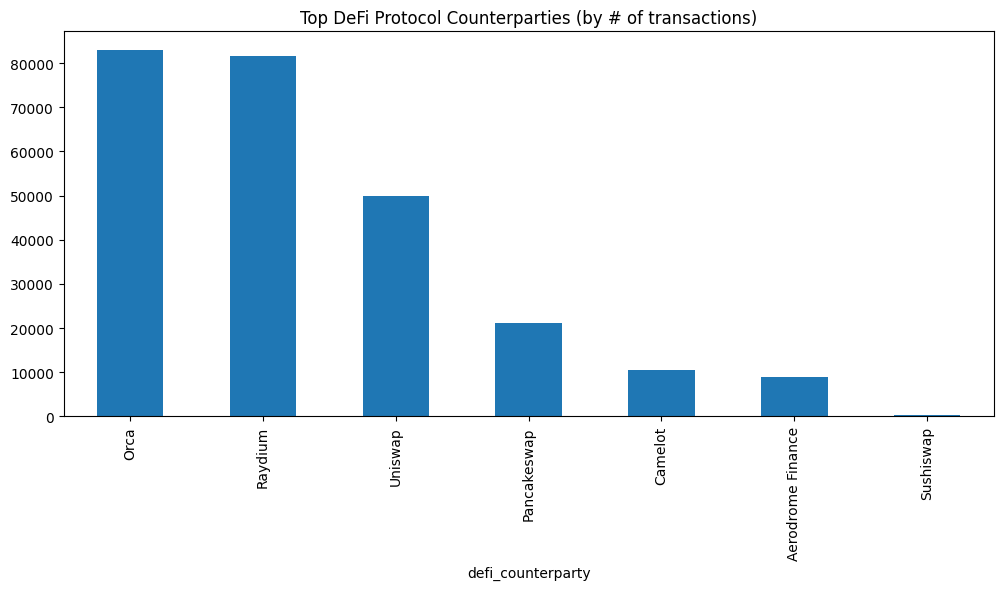

In [32]:
protocol_counts = df_defi["defi_counterparty"].value_counts()

protocol_counts.head(10).plot(
    kind="bar",
    figsize=(12, 5),
    title="Top DeFi Protocol Counterparties (by # of transactions)"
)


In [33]:
volume_by_protocol = (
    df_defi.groupby("defi_counterparty")["usd"]
    .sum()
    .sort_values(ascending=False)
)

volume_by_protocol.head(10)


,usd
defi_counterparty,
Uniswap,3.517535e+08
Aerodrome Finance,1.095274e+08
Orca,8.540257e+07
Pancakeswap,4.538136e+07
Raydium,2.092381e+07
Camelot,2.995392e+06
Sushiswap,4.251452e+05


<Axes: title={'center': 'Top DeFi Protocol Counterparties (by USD volume)'}, xlabel='defi_counterparty'>

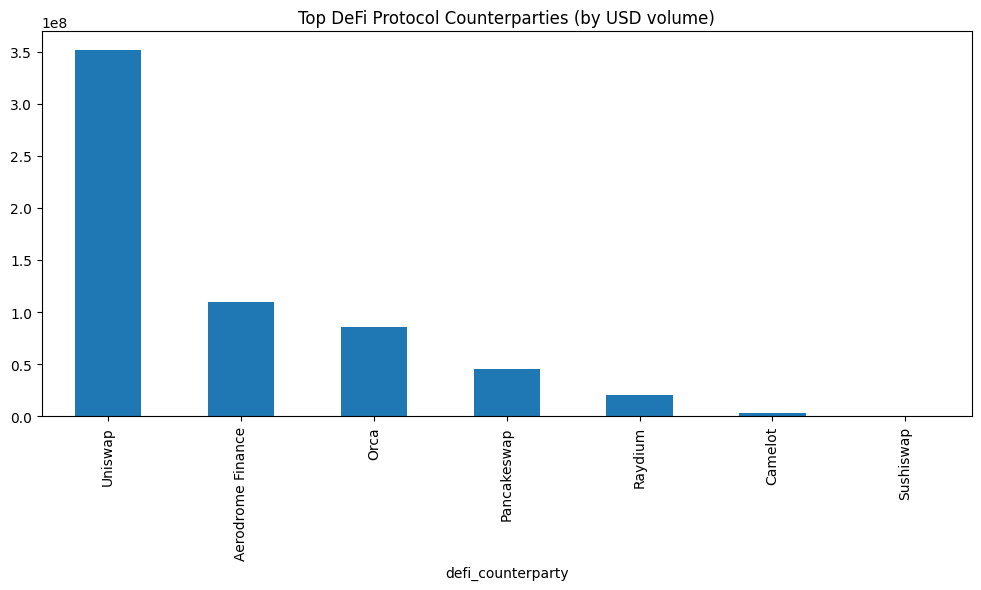

In [34]:
volume_by_protocol.head(10).plot(
    kind="bar",
    figsize=(12, 5),
    title="Top DeFi Protocol Counterparties (by USD volume)"
)


Chain usage distribution:


,count
chain,
solana,294457
arbitrum,78600
ethereum,24327
base,21413
binance_smart_chain,7445
optimism,3391
avalanche,8
polygon,6
flare,2


<Axes: title={'center': 'Transactions per Chain'}, xlabel='chain'>

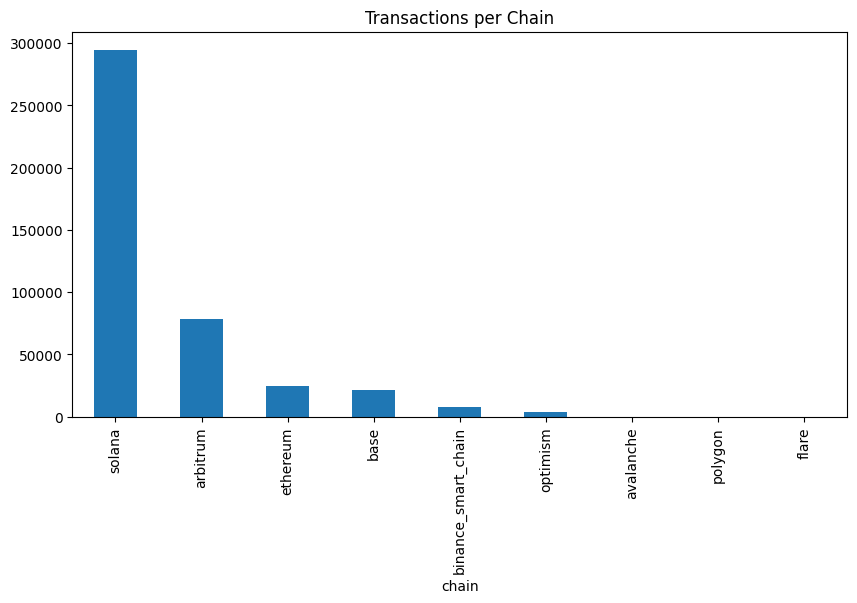

In [35]:
# ----------------------------------------------------------
# CHAIN DISTRIBUTION
# ----------------------------------------------------------
chain_counts = df_clean['chain'].value_counts()

print("Chain usage distribution:")
display(chain_counts)

# Plot
chain_counts.plot(kind='bar', figsize=(10,5), title="Transactions per Chain")

Top tokens by USD volume:


,usd
token,
USDC,5.591896e+08
WETH,2.948276e+08
ETH,2.665528e+08
USDT,1.643870e+08
WSOL,1.169071e+08
SOL,8.988636e+07
CBBTC,8.207380e+07
WBTC,6.830062e+07
TRUMP,2.217641e+07


<Axes: title={'center': 'Top 20 Tokens by USD Volume'}, xlabel='token'>

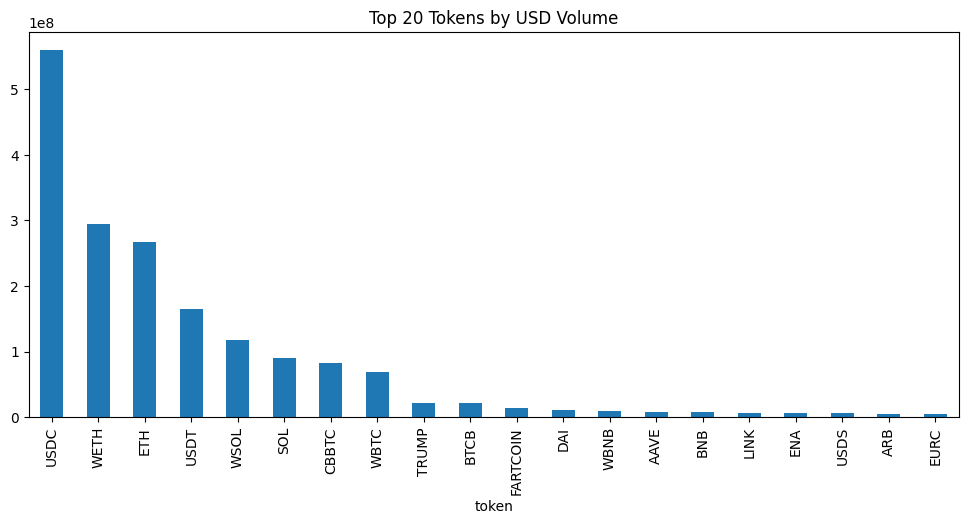

In [36]:
# ----------------------------------------------------------
# TOP TOKENS BY USD VOLUME
# ----------------------------------------------------------
token_volume = (
    df_clean.groupby("token")["usd"]
    .sum()
    .sort_values(ascending=False)
)

print("Top tokens by USD volume:")
display(token_volume.head(20))

token_volume.head(20).plot(kind='bar', figsize=(12,5), title="Top 20 Tokens by USD Volume")


In [37]:
# # ----------------------------------------------------------
# # DEFI-ONLY TRANSACTIONS
# # ----------------------------------------------------------
# df_defi = df_clean[
#     (df_clean["from_class"] == "DeFi") |
#     (df_clean["to_class"] == "DeFi")
# ]

# print("Total DeFi transactions:", len(df_defi))

# # ----------------------------------------------------------
# # TOP DEFI PROTOCOL COUNTERPARTIES
# # ----------------------------------------------------------
# defi_interactions = (
#     df_defi['from_entity']
#     .append(df_defi['to_entity'])
#     .value_counts()
# )

# print("Most frequent DeFi counterparties:")
# display(defi_interactions.head(20))

# defi_interactions.head(20).plot(kind="bar", figsize=(12,5), title="Top DeFi Protocol Interactions")


Total DeFi transactions: 267683
Most frequent DeFi counterparties:


,count
Wintermute,255453
Orca,89559
Raydium,87430
Uniswap,50006
Pancakeswap,21143
Unknown,12230
Camelot,10434
Aerodrome Finance,8841
Sushiswap,270


<Axes: title={'center': 'Top DeFi Protocol Interactions'}>

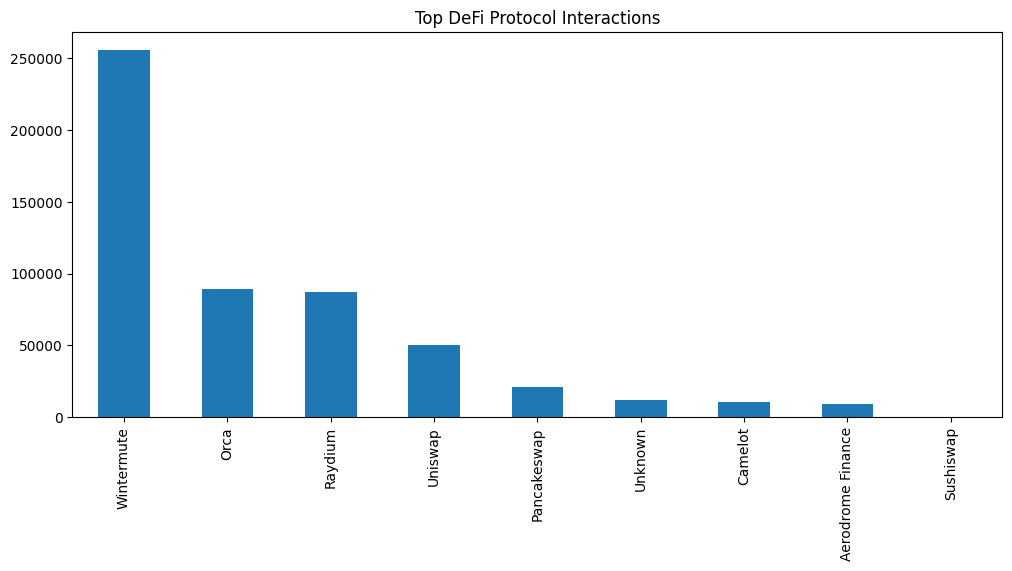

In [38]:
# ----------------------------------------------------------
# DEFI-ONLY TRANSACTIONS
# ----------------------------------------------------------
df_defi = df_clean[
    (df_clean["from_class"] == "DeFi") |
    (df_clean["to_class"] == "DeFi")
]

print("Total DeFi transactions:", len(df_defi))

# ----------------------------------------------------------
# TOP DEFI PROTOCOL COUNTERPARTIES (FIXED FOR PANDAS 2.x)
# ----------------------------------------------------------
defi_interactions = pd.concat(
    [df_defi['from_entity'], df_defi['to_entity']]
).value_counts()

print("Most frequent DeFi counterparties:")
display(defi_interactions.head(20))

# Plot
defi_interactions.head(20).plot(
    kind="bar", figsize=(12,5), title="Top DeFi Protocol Interactions"
)


Daily USD flow:


,usd
date,
2025-04-08,1.827634e+09


<Axes: title={'center': 'Daily Total USD Flow'}, xlabel='date'>

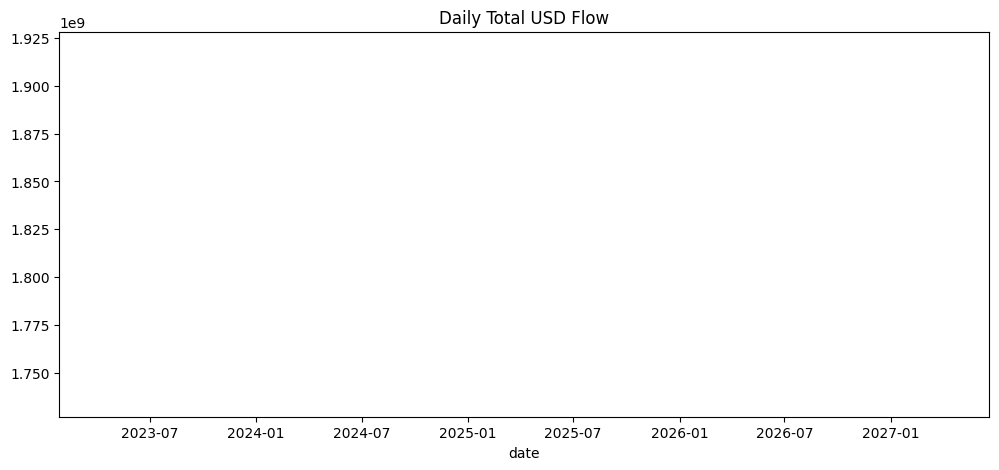

In [39]:
# ----------------------------------------------------------
# DAILY TOTAL USD FLOW
# ----------------------------------------------------------
df_clean["date"] = df_clean["timestamp"].dt.date
daily_flow = df_clean.groupby("date")["usd"].sum()

print("Daily USD flow:")
display(daily_flow.tail())

daily_flow.plot(figsize=(12,5), title="Daily Total USD Flow")


Wintermute as Sender      227848
Wintermute as Receiver    181652
dtype: int64


<Axes: title={'center': 'Wintermute Role in Transactions'}>

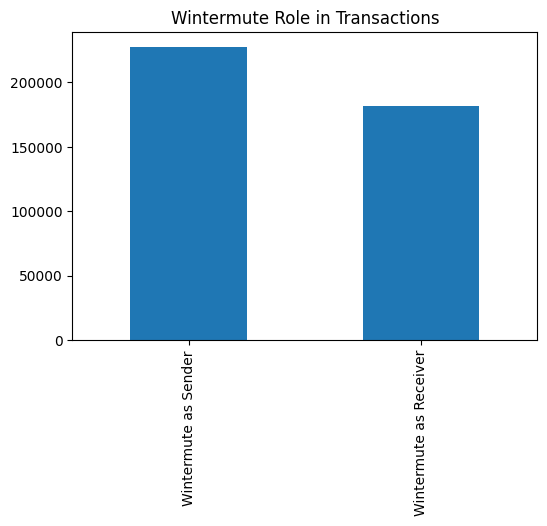

In [40]:
# ----------------------------------------------------------
# ROLE ANALYSIS
# ----------------------------------------------------------
role_counts = {
    "Wintermute as Sender": (df_clean["from_entity"] == "Wintermute").sum(),
    "Wintermute as Receiver": (df_clean["to_entity"] == "Wintermute").sum()
}

role_counts = pd.Series(role_counts)

print(role_counts)

role_counts.plot(kind='bar', figsize=(6,4), title="Wintermute Role in Transactions")


## 3. Classification Breakdown

Here I summarise how many entities and transactions fall into each
classification bucket (DeFi, CEX, Bridge, Internal, Unknown). This helps
assess the quality and coverage of the entity classification step.


In [42]:
# ----------------------------------------------------------
# 3.1 Entity-level classification breakdown
# ----------------------------------------------------------
# Build a table of unique entities and their assigned class.
entities_from = df_clean[["from_entity", "from_class"]].rename(
    columns={"from_entity": "entity", "from_class": "entity_class"}
)
entities_to = df_clean[["to_entity", "to_class"]].rename(
    columns={"to_entity": "entity", "to_class": "entity_class"}
)

entity_classes = (
    pd.concat([entities_from, entities_to], ignore_index=True)
    .drop_duplicates()
)

print("Total unique entities:", len(entity_classes))
print("\nEntity classification counts:")
display(entity_classes["entity_class"].value_counts())

# Optional: see example entities per class
for cls in ["DeFi", "CEX", "Bridge", "Internal", "Unknown"]:
    print(f"\nSample entities classified as {cls}:")
    display(entity_classes[entity_classes["entity_class"] == cls].head(10))


Total unique entities: 86

Entity classification counts:


,count
entity_class,
Unknown,71
DeFi,7
CEX,7
Internal,1



Sample entities classified as DeFi:


,entity,entity_class
0,Camelot,DeFi
1,Uniswap,DeFi
2,Aerodrome Finance,DeFi
7,Pancakeswap,DeFi
31,Raydium,DeFi
43,Orca,DeFi
6164,Sushiswap,DeFi



Sample entities classified as CEX:


,entity,entity_class
600,Binance,CEX
2919,Coinbase,CEX
4234,Bybit,CEX
16000,Bitstamp,CEX
59898,Kraken,CEX
176528,Kucoin,CEX
234531,Bitfinex,CEX



Sample entities classified as Bridge:


,entity,entity_class



Sample entities classified as Internal:


,entity,entity_class
3,Wintermute,Internal



Sample entities classified as Unknown:


,entity,entity_class
10,Fluid (Instadapp),Unknown
13,Cow Protocol,Unknown
23,Unknown,Unknown
44,Meteora (Prev. Mercurial),Unknown
78,Phoenix,Unknown
723,Metamask,Unknown
1059,Paraswap,Unknown
1623,Curve.Fi,Unknown
2220,Okx,Unknown
2579,0X,Unknown


In [43]:
# ----------------------------------------------------------
# 3.2 Transaction-level classification breakdown
# ----------------------------------------------------------
# For each transaction, we care about the NON-Wintermute side
# when Wintermute is involved.

# Subset where Wintermute appears
df_wm = df_clean[
    (df_clean["from_entity"] == "Wintermute") |
    (df_clean["to_entity"] == "Wintermute")
].copy()

def get_counterparty_class(row):
    if row["from_entity"] == "Wintermute":
        return row["to_class"]
    elif row["to_entity"] == "Wintermute":
        return row["from_class"]
    return "None"

df_wm["counterparty_class"] = df_wm.apply(get_counterparty_class, axis=1)

print("Transaction counts by counterparty class (when Wintermute involved):")
tx_class_counts = df_wm["counterparty_class"].value_counts()
display(tx_class_counts)


Transaction counts by counterparty class (when Wintermute involved):


,count
counterparty_class,
DeFi,255453
Unknown,152741
CEX,756
Internal,275


## 4. Token Activity: Volume vs Frequency

The assignment asks for which tokens Wintermute trades the most
both by traded volume and by transaction count. Here I compute and
compare both metrics.


Top tokens by transaction count (DeFi, Wintermute involved):


,count
token,
WSOL,81752
USDC,77787
WETH,35596
USDT,15807
WBTC,8899
CBBTC,7524
FARTCOIN,7129
ARB,5142
WBNB,2748


<Axes: title={'center': 'Top Tokens by Transaction Count (Wintermute–DeFi)'}, xlabel='token'>

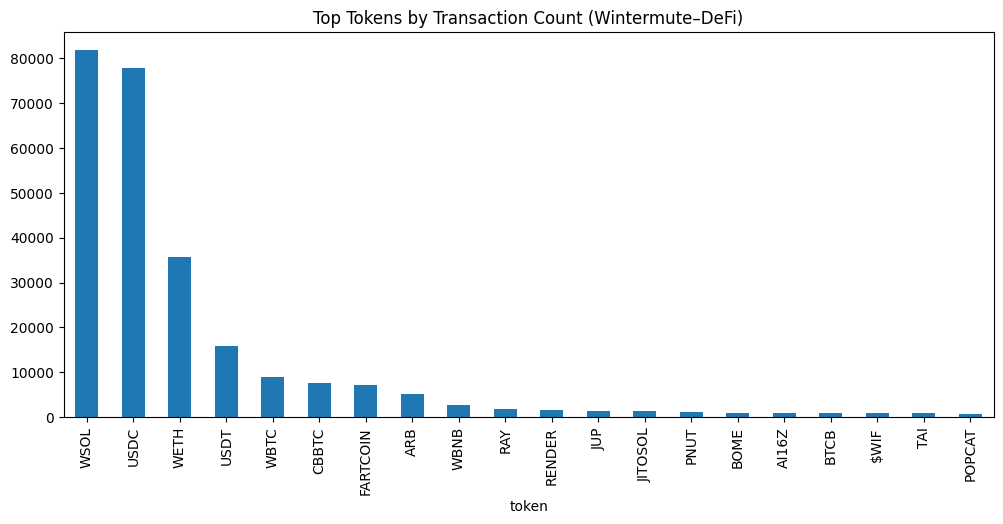

In [44]:
# ----------------------------------------------------------
# 4.1 Token frequency (number of txs per token)
# ----------------------------------------------------------
token_freq = df_defi["token"].value_counts()

print("Top tokens by transaction count (DeFi, Wintermute involved):")
display(token_freq.head(20))

token_freq.head(20).plot(
    kind="bar",
    figsize=(12, 5),
    title="Top Tokens by Transaction Count (Wintermute–DeFi)"
)


Top tokens by USD volume (DeFi, Wintermute involved):


,usd
token,
WETH,2.202868e+08
USDC,1.878992e+08
WSOL,5.068690e+07
CBBTC,4.912550e+07
USDT,3.757559e+07
WBTC,3.042205e+07
WBNB,1.000503e+07
BTCB,6.429318e+06
FARTCOIN,4.717616e+06


<Axes: title={'center': 'Top Tokens by USD Volume (Wintermute–DeFi)'}, xlabel='token'>

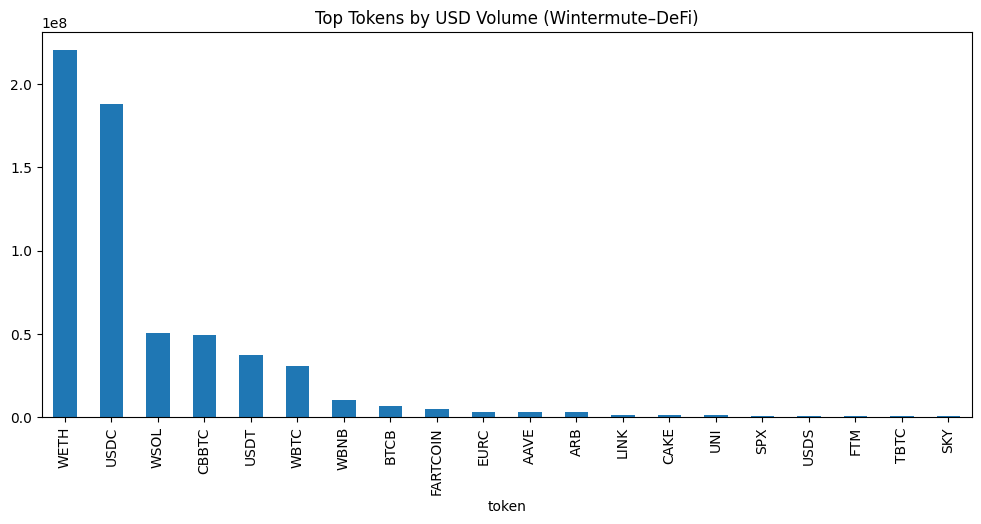

In [45]:
# ----------------------------------------------------------
# 4.2 Token volume (USD) in DeFi subset
# ----------------------------------------------------------
token_volume_defi = (
    df_defi.groupby("token")["usd"]
    .sum()
    .sort_values(ascending=False)
)

print("Top tokens by USD volume (DeFi, Wintermute involved):")
display(token_volume_defi.head(20))

token_volume_defi.head(20).plot(
    kind="bar",
    figsize=(12, 5),
    title="Top Tokens by USD Volume (Wintermute–DeFi)"
)


###time series

## 5. Temporal Trends in Wintermute DeFi Activity

Here I look at transaction counts and USD volume over time, restricted
to Wintermute–DeFi interactions. This reveals when activity is most
concentrated during the day.


/tmp/ipython-input-3187404896.py:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_count = df_defi_ts["usd"].resample("1H").count()


timestamp
2025-04-08 01:00:00+00:00    18976
2025-04-08 02:00:00+00:00    33417
2025-04-08 03:00:00+00:00    21202
2025-04-08 04:00:00+00:00    20350
2025-04-08 05:00:00+00:00    21680
2025-04-08 06:00:00+00:00    21264
2025-04-08 07:00:00+00:00    21032
2025-04-08 08:00:00+00:00    18656
2025-04-08 09:00:00+00:00    18642
2025-04-08 10:00:00+00:00    16580
2025-04-08 11:00:00+00:00    28456
2025-04-08 12:00:00+00:00    27428
Freq: h, Name: usd, dtype: int64


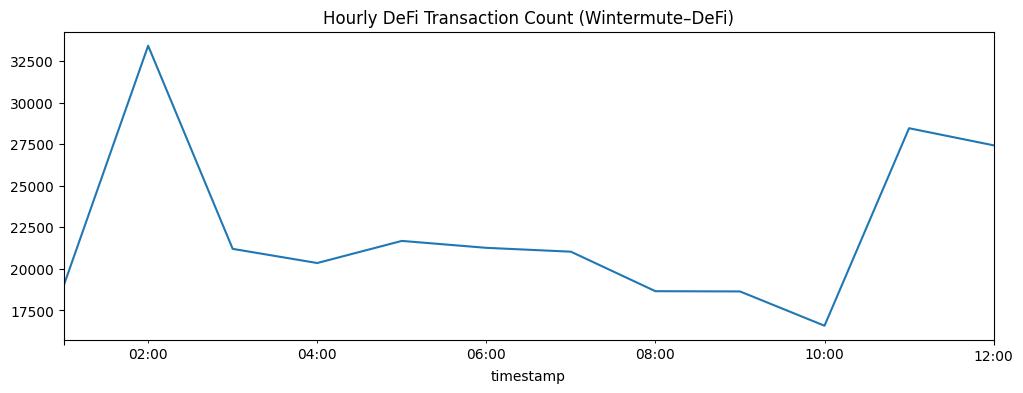

In [46]:
# Make sure timestamp is index for resampling
df_defi_ts = df_defi.set_index("timestamp").sort_index()

# ----------------------------------------------------------
# 5.1 Hourly transaction count
# ----------------------------------------------------------
hourly_count = df_defi_ts["usd"].resample("1H").count()
hourly_count.plot(
    figsize=(12, 4),
    title="Hourly DeFi Transaction Count (Wintermute–DeFi)"
)
print(hourly_count)


/tmp/ipython-input-884990515.py:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_volume = df_defi_ts["usd"].resample("1H").sum()


timestamp
2025-04-08 01:00:00+00:00    3.497903e+07
2025-04-08 02:00:00+00:00    9.184455e+07
2025-04-08 03:00:00+00:00    2.903515e+07
2025-04-08 04:00:00+00:00    7.100424e+07
2025-04-08 05:00:00+00:00    3.561035e+07
2025-04-08 06:00:00+00:00    3.382726e+07
2025-04-08 07:00:00+00:00    5.556992e+07
2025-04-08 08:00:00+00:00    3.395346e+07
2025-04-08 09:00:00+00:00    6.921450e+07
2025-04-08 10:00:00+00:00    7.343710e+07
2025-04-08 11:00:00+00:00    4.832487e+07
2025-04-08 12:00:00+00:00    4.527011e+07
Freq: h, Name: usd, dtype: float64


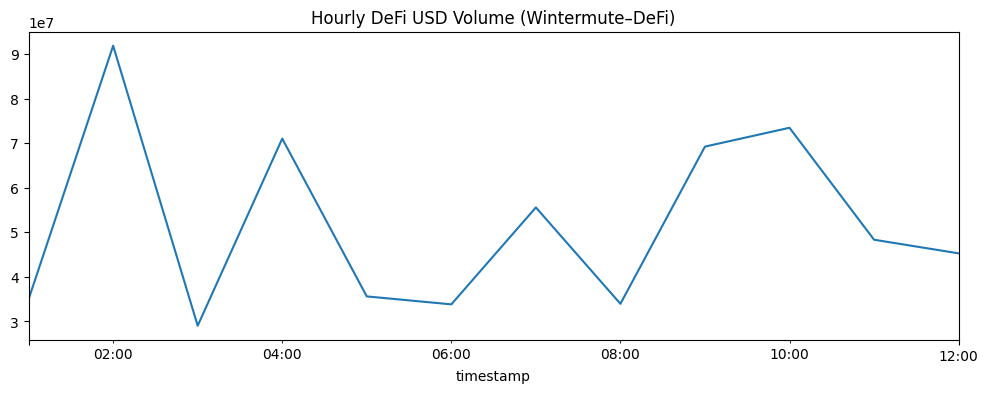

In [47]:
# ----------------------------------------------------------
# 5.2 Hourly USD volume
# ----------------------------------------------------------
hourly_volume = df_defi_ts["usd"].resample("1H").sum()
hourly_volume.plot(
    figsize=(12, 4),
    title="Hourly DeFi USD Volume (Wintermute–DeFi)"
)
print(hourly_volume)


/tmp/ipython-input-3472834047.py:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  .resample("1H")


chain,arbitrum,base,binance_smart_chain,ethereum,optimism,solana
timestamp,,,,,,
2025-04-08 08:00:00+00:00,2.288481e+06,9.520980e+06,1.643691e+06,1.282734e+07,32839.756728,7.640129e+06
2025-04-08 09:00:00+00:00,2.565898e+06,1.111380e+07,3.513368e+06,4.621173e+07,34084.559291,5.775616e+06
2025-04-08 10:00:00+00:00,1.485540e+06,8.755047e+06,1.322797e+06,5.478669e+07,21506.785454,7.065523e+06
2025-04-08 11:00:00+00:00,3.654517e+06,1.317448e+07,3.523030e+06,1.550622e+07,81052.626479,1.238557e+07
2025-04-08 12:00:00+00:00,3.830314e+06,1.271822e+07,2.941087e+06,1.266754e+07,35297.553191,1.307765e+07


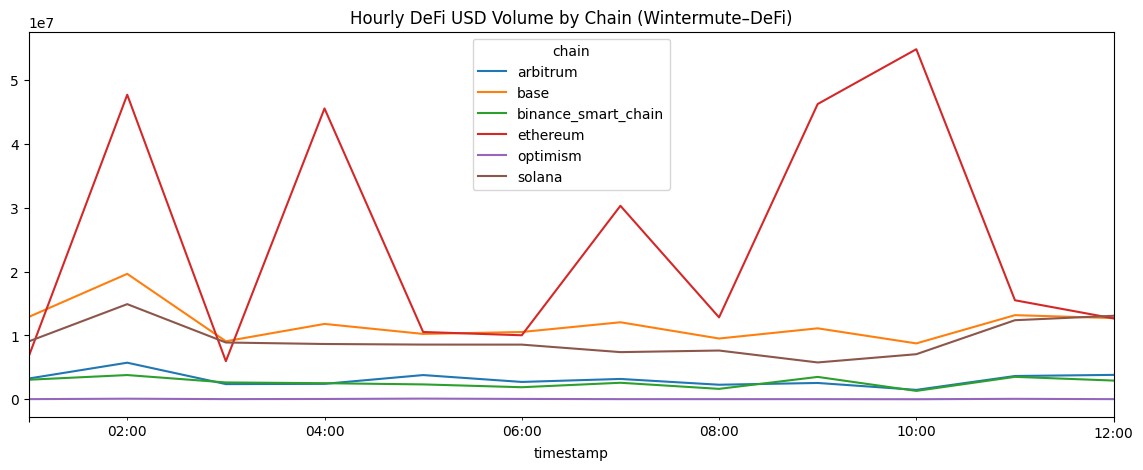

In [48]:
# ----------------------------------------------------------
# 5.3 Hourly volume by chain (stacked, or separate)
# ----------------------------------------------------------
hourly_chain_volume = (
    df_defi_ts
    .groupby("chain")["usd"]
    .resample("1H")
    .sum()
    .unstack(level=0)
    .fillna(0)
)

hourly_chain_volume.plot(
    figsize=(14, 5),
    title="Hourly DeFi USD Volume by Chain (Wintermute–DeFi)"
)
hourly_chain_volume.tail()


In [51]:
df_defi["defi_counterparty"] = df_defi.apply(get_defi_counterparty, axis=1)


/tmp/ipython-input-2576218296.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_defi["defi_counterparty"] = df_defi.apply(get_defi_counterparty, axis=1)


chain,arbitrum,base,binance_smart_chain,ethereum,optimism,solana
defi_counterparty,,,,,,
Aerodrome Finance,0.000000e+00,1.095274e+08,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
Camelot,2.995392e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
Orca,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,8.540257e+07
Pancakeswap,4.108433e+06,5.336095e+06,3.183119e+07,4.105641e+06,0.000000,0.000000e+00
Raydium,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2.092381e+07
Sushiswap,0.000000e+00,0.000000e+00,0.000000e+00,4.251452e+05,0.000000,0.000000e+00
Uniswap,3.025253e+07,2.668454e+07,0.000000e+00,2.941550e+08,661441.972986,0.000000e+00


<Axes: title={'center': 'USD Volume per Protocol per Chain (Top 10 protocols)'}, xlabel='defi_counterparty'>

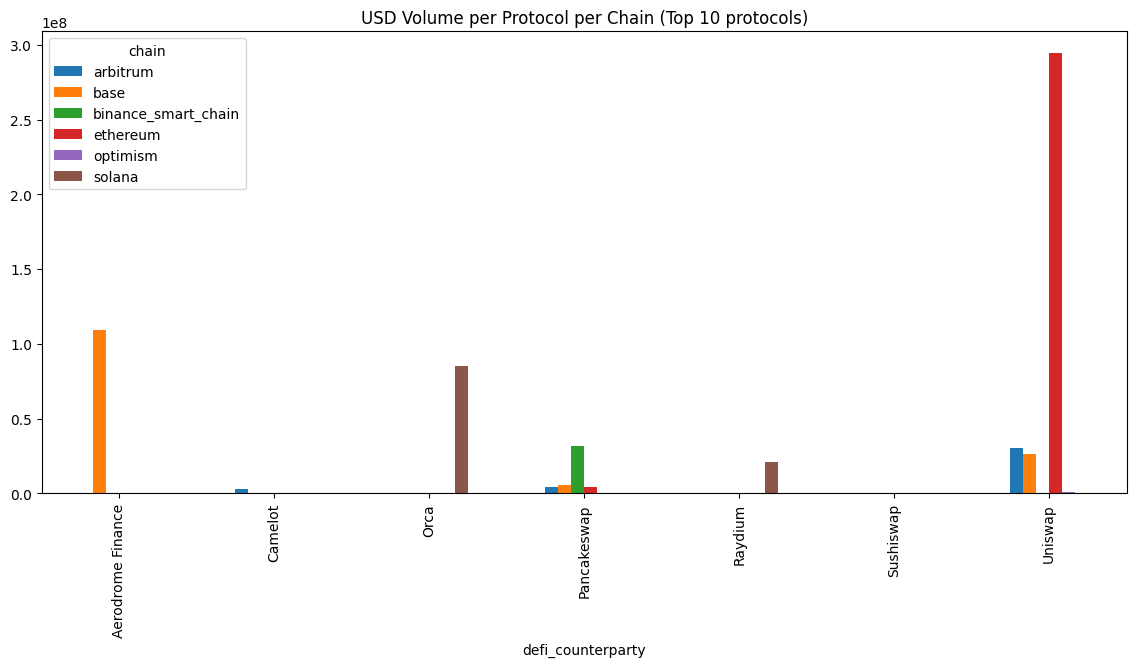

In [52]:
# ----------------------------------------------------------
# PROTOCOL × CHAIN MATRIX (USD volume)
# ----------------------------------------------------------
protocol_chain_volume = (
    df_defi.pivot_table(
        index="defi_counterparty",
        columns="chain",
        values="usd",
        aggfunc="sum",
        fill_value=0
    )
)

display(protocol_chain_volume)

protocol_chain_volume.head(10).plot(
    kind="bar",
    figsize=(14, 6),
    title="USD Volume per Protocol per Chain (Top 10 protocols)"
)


In [53]:
# ----------------------------------------------------------
# INFLOW vs OUTFLOW per protocol
# ----------------------------------------------------------
def direction(row):
    if row["from_entity"] == "Wintermute":
        return "outflow"
    elif row["to_entity"] == "Wintermute":
        return "inflow"
    return "other"

df_defi["flow_direction"] = df_defi.apply(direction, axis=1)

flow_table = (
    df_defi.groupby(["defi_counterparty", "flow_direction"])["usd"]
    .sum()
    .unstack(fill_value=0)
    .sort_values("outflow", ascending=False)
)

display(flow_table.head(20))


/tmp/ipython-input-619096886.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_defi["flow_direction"] = df_defi.apply(direction, axis=1)


flow_direction,inflow,outflow
defi_counterparty,,
Uniswap,1.757859e+08,1.759677e+08
Aerodrome Finance,5.473768e+07,5.478975e+07
Orca,4.326938e+07,4.213319e+07
Pancakeswap,2.266802e+07,2.271334e+07
Raydium,1.058108e+07,1.034272e+07
Camelot,1.497258e+06,1.498134e+06
Sushiswap,2.118680e+05,2.132772e+05
